In [9]:
import pandas as pd
import numpy as np
file_path = '/Users/z/Desktop/Mathor/数据.xlsx'
df = pd.read_excel(file_path)
# 过滤不符合条件的经纬度数据
df = df[(df['经度'] >= 95 ) & (df['经度'] <= 180) & (df['纬度'] >= 2) & (df['纬度'] <= 58)]
df = df[(df['气压'] > 100 ) & (df['风速'] <= 100)]
import pandas as pd

def convert_direction(direction):
    # 如果移动方向为空，直接返回空
    if pd.isnull(direction):
        return direction
    
    # 创建字符到数值的映射
    char_mapping = {
        '东': '1',
        '南': '2',
        '西': '3',
        '北': '4',
        '偏': '0',  
        'E': '1',
        'S': '2',
        'W': '3',
        'N': '4',
    }
    
    # 初始化转换结果
    converted = ''
    
    # 逐个字符转换，忽略“偏”字
    for char in direction:
        if char in char_mapping:
            converted += char_mapping[char]
    
    # 返回转换后的结果
    return converted

# 应用转换函数
df['移动方向数值'] = df['移动方向'].apply(convert_direction)

# 如果需要将新列放到原列后面
current_direction_index = df.columns.get_loc('移动方向')
df.insert(current_direction_index + 1, '移动方向数值', df.pop('移动方向数值'))

# 假设你要转换的列名为 '台风起始时间', '台风结束时间', '当前台风时间'
df['台风起始时间'] = pd.to_datetime(df['台风起始时间'])
df['台风结束时间'] = pd.to_datetime(df['台风结束时间'])
df['当前台风时间'] = pd.to_datetime(df['当前台风时间'])
# 提取年份
df['年份'] = df['当前台风时间'].dt.year
df['月份'] = df['当前台风时间'].dt.month
# 定义一个函数将经纬度转换为以.5结尾的值
def convert_to_half(value):
    if value % 1 < 0.25:  # 小于 x.25
        return np.floor(value) + 0.5
    elif value % 1 < 0.75:  # 在 x.25 和 x.75 之间
        return np.floor(value) + 0.5
    else:  # 大于等于 x.75
        return np.ceil(value) - 0.5

# 应用函数转换经纬度
df['调整后的经度'] = df['经度'].apply(convert_to_half)
df['调整后的纬度'] = df['纬度'].apply(convert_to_half)

# 根据年份分类
grouped = df.groupby('年份')[['调整后的经度', '调整后的纬度']].apply(lambda x: x.reset_index(drop=True))
# 替换台风强度中的“超强台风（Super TY）”为“超强台风（SuperTY）”
df['台风强度'] = df['台风强度'].replace('超强台风(Super TY)', '超强台风(SuperTY)')

# 剔除年份为1945的行
df = df[df['年份'] != 1945]
# 计算气压值不为0的平均值
pressure_mean = df.loc[df['气压'] != 0, '气压'].mean()
# 使用 loc 来进行替换，以避免警告
df.loc[df['气压'] == 0, '气压'] = pressure_mean
import pandas as pd

# 假设 df 是你的 DataFrame，且风速列名为 '风速'
# 定义风速的区间和对应的台风强度类别
bins = [-1, 10.8, 17.1, 24.4, 32.6, 41.4, 50.9, float('inf')]
labels = ['弱热带低压或未知', '热带低压（TD）', '热带风暴（TS）', '强热带风暴（STS）', '台风（TY）', '强台风（STY）', '超强台风（SuperTY）']

# 仅针对“台风强度”为 NaN 且“风速”不为空或不为零的行进行分类
mask = df['台风强度'].isnull() & (df['风速'].notnull() & (df['风速'] > 0))

# 使用 cut() 方法根据风速分类
df.loc[mask, '台风强度'] = pd.cut(df.loc[mask, '风速'], bins=bins, labels=labels)

# 对海洋表面温度的空缺值进行插值填补
df['海洋表面温度'] = df['海洋表面温度'].interpolate(method='linear')

# 如果想使用其他插值方法，比如时间插值(需要时间索引)可以使用：
 #df['海洋表面温度'] = df['海洋表面温度'].interpolate(method='time')
df['气压'] = df['气压'].interpolate(method='linear')# 对气压的空缺值进行线性插值
# 通过布尔条件剔除台风强度和风速均为零或空值的行
df = df[~((df['台风强度'].isnull() | (df['台风强度'] == 0)) & 
           (df['风速'].isnull() | (df['风速'] == 0)))]
# 创建台风强度的映射
typhoon_intensity_mapping = {
    '弱热带低压或未知': 0,
    '热带低压(TD)': 1,
    '热带风暴(TS)': 2,
    '强热带风暴(STS)': 3,
    '台风(TY)': 4,
    '强台风(STY)': 5,
    '超强台风(SuperTY)': 6,
}

# 将台风强度列转换为数值并保留原列
df['台风强度数值'] = df['台风强度'].map(typhoon_intensity_mapping)
current_intensity_index = df.columns.get_loc('台风强度')
df.insert(current_intensity_index + 1, '台风强度数值', df.pop('台风强度数值'))
# 创建台风强度的映射
typhoon_intensity_mapping = {
    '弱热带低压或未知': 0,
    '热带低压(TD)': 1,
    '热带风暴(TS)': 2,
    '强热带风暴(STS)': 3,
    '台风(TY)': 4,
    '强台风(STY)': 5,
    '超强台风(SuperTY)': 6,
}

# 将台风强度列转换为数值并保留原列
df['台风强度数值'] = df['台风强度'].map(typhoon_intensity_mapping)
current_intensity_index = df.columns.get_loc('台风强度')
df.insert(current_intensity_index + 1, '台风强度数值', df.pop('台风强度数值'))
# 将时间格式化为所需的字符串格式
df['格式化时间'] = df['当前台风时间'].dt.strftime('%Y%m%d%H')
# 获取 '当前台风时间' 的列索引
current_time_index = df.columns.get_loc('当前台风时间')

# 将 '格式化时间' 列插入到 '当前台风时间' 的后面
df.insert(current_time_index + 1, '格式化时间', df.pop('格式化时间'))

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 假设 df 是已经加载的数据集
df['当前台风时间'] = pd.to_datetime(df['当前台风时间'])
filtered_df = df[(df['当前台风时间'].dt.year >= 2015) & (df['当前台风时间'].dt.year <= 2020)]

# 转换时间为步长，并将其加入到特征中
filtered_df['时间步长'] = (filtered_df['当前台风时间'] - filtered_df['当前台风时间'].min()).dt.total_seconds() / 21600  # 每6小时一次

# 使用经度、纬度和时间步长作为输入
data = filtered_df[['经度', '纬度', '时间步长']].values
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# 创建数据集
def create_dataset(data, time_step=20):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step, :2])  # 假设目标是经度和纬度
    return np.array(X), np.array(y)

X, y = create_dataset(data, time_step=20)

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建RNN模型
def create_rnn_model(units=50, dropout_rate=0.3):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    model.add(SimpleRNN(units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(SimpleRNN(units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2))  # 输出经度和纬度
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 使用KerasRegressor封装模型
model = KerasRegressor(model=create_rnn_model, verbose=0)

# 定义超参数范围
param_distributions = {
    'model__units': [50, 100],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100]
}

# 使用RandomizedSearchCV进行超参数优化
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, cv=3, n_iter=5)
grid_result = random_search.fit(X_train, y_train)

# 输出最佳参数
print(f"Best score: {grid_result.best_score_}")
print(f"Best parameters: {grid_result.best_params_}")

# 使用最佳参数训练模型
best_params = grid_result.best_params_
best_model = create_rnn_model(units=best_params['model__units'], dropout_rate=best_params['model__dropout_rate'])
best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=10)])

# 进行预测
predictions = best_model.predict(X_test)

# 反归一化预测结果和实际值
predictions_unscaled = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], 1))], axis=1))[:, :2]
y_test_unscaled = scaler.inverse_transform(np.concatenate([y_test, np.zeros((y_test.shape[0], 1))], axis=1))[:, :2]

# 计算评估指标
mse = mean_squared_error(y_test_unscaled, predictions_unscaled)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)
r2 = r2_score(y_test_unscaled, predictions_unscaled)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# 绘制预测结果与实际值的对比图
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled[:, 0], label="True Longitude", alpha=0.7)
plt.plot(predictions_unscaled[:, 0], label="Predicted Longitude", alpha=0.7)
plt.plot(y_test_unscaled[:, 1], label="True Latitude", alpha=0.7)
plt.plot(predictions_unscaled[:, 1], label="Predicted Latitude", alpha=0.7)
plt.title("Optimized RNN Predicted vs Actual Typhoon Path")
plt.xlabel("Time Steps")
plt.ylabel("Longitude / Latitude")
plt.legend()
plt.savefig("优化后的RNN预测与实际台风路径对比.png", format="png", dpi=600, bbox_inches='tight')
plt.show()

C:\Users\z\AppData\Local\Temp\ipykernel_18960\2984244268.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['时间步长'] = (filtered_df['当前台风时间'] - filtered_df['当前台风时间'].min()).dt.total_seconds() / 21600  # 每6小时一次

KeyboardInterrupt



In [ ]:
# 读取贝碧嘉台风数据
df_BEBINCA = pd.read_excel('贝碧嘉数据.xlsx')

# 转换时间列为日期时间格式
df_BEBINCA['时间'] = pd.to_datetime(df_BEBINCA['时间'])

# 转换时间为步长，并将其加入到特征中
df_BEBINCA['时间步长'] = (df_BEBINCA['时间'] - df_BEBINCA['时间'].min()).dt.total_seconds() / 21600  # 每6小时一次

# 使用经度、纬度和时间步长作为输入
data_BEBINCA = df_BEBINCA[['经度', '纬度', '时间步长']].values
data_BEBINCA = scaler.transform(data_BEBINCA)  # 使用之前的缩放器进行缩放

# 创建输入数据集
X_BEBINCA, _ = create_dataset(data_BEBINCA, time_step=20)  # 不需要返回y

# 使用训练好的模型进行预测
predictions_BEBINCA = best_model.predict(X_BEBINCA)

# 反归一化预测结果
predictions_unscaled_BEBINCA = scaler.inverse_transform(np.concatenate((predictions_BEBINCA, np.zeros((predictions_BEBINCA.shape[0], 1))), axis=1))[:, :2]

# 将预测结果保存到 DataFrame
df_BEBINCA['预测经度'] = np.nan
df_BEBINCA['预测纬度'] = np.nan

# 将预测结果放入 DataFrame 中
start_index = 20  # 从第20个位置开始填充预测结果
df_BEBINCA.iloc[start_index:start_index + len(predictions_unscaled_BEBINCA), df_BEBINCA.columns.get_loc('预测经度')] = predictions_unscaled_BEBINCA[:, 0]
df_BEBINCA.iloc[start_index:start_index + len(predictions_unscaled_BEBINCA), df_BEBINCA.columns.get_loc('预测纬度')] = predictions_unscaled_BEBINCA[:, 1]

# 保存结果到 Excel 文件
output_file = 'RNN贝碧嘉预测.xlsx'
df_BEBINCA.to_excel(output_file, index=False)

print(f"预测结果已保存到 {output_file}")


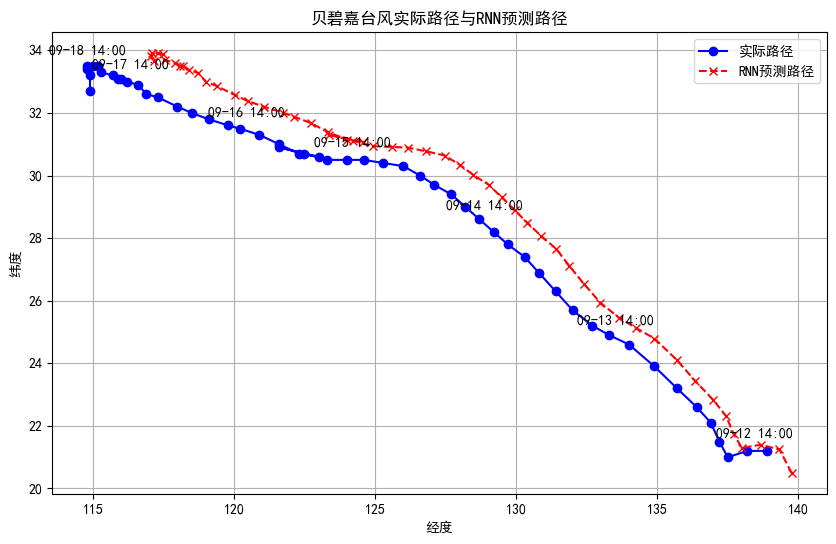

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import datetime

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 使负号显示正常

# 1. 读取 RNN 预测结果 Excel 文件
rnn_file_path = "C:\\Users\\z\\Desktop\\Mathor\\RNN贝碧嘉预测.xlsx"
rnn_data = pd.read_excel(rnn_file_path)

# 假设 Excel 文件包含以下列：实际经度、实际纬度、RNN预测经度、RNN预测纬度、时间
# 根据你的文件实际列名来调整
actual_lon_rnn = rnn_data['经度']
actual_lat_rnn = rnn_data['纬度']
rnn_predicted_lon = rnn_data['预测经度']
rnn_predicted_lat = rnn_data['预测纬度']
time_rnn = pd.to_datetime(rnn_data['时间'])

# 2. 插值处理
# 提取 2024年9月12日到2024年9月18日的日期和对应的时间
target_dates = [datetime.datetime(2024, 9, day, 14, 0) for day in range(12, 19)]
target_times_numeric = [(target_date - datetime.datetime(1970, 1, 1)).total_seconds() for target_date in target_dates]

# 转换时间为浮点数形式（时间戳）
time_numeric_rnn = time_rnn.astype(np.int64) / 1e9  # 转换为秒

# 使用线性插值
interp_actual_lon_rnn = interp1d(time_numeric_rnn, actual_lon_rnn, fill_value="extrapolate")
interp_actual_lat_rnn = interp1d(time_numeric_rnn, actual_lat_rnn, fill_value="extrapolate")
interp_rnn_predicted_lon = interp1d(time_numeric_rnn, rnn_predicted_lon, fill_value="extrapolate")
interp_rnn_predicted_lat = interp1d(time_numeric_rnn, rnn_predicted_lat, fill_value="extrapolate")

# 获取插值结果
interp_actual_lon_values_rnn = interp_actual_lon_rnn(target_times_numeric)
interp_actual_lat_values_rnn = interp_actual_lat_rnn(target_times_numeric)
interp_rnn_predicted_lon_values = interp_rnn_predicted_lon(target_times_numeric)
interp_rnn_predicted_lat_values = interp_rnn_predicted_lat(target_times_numeric)

# 3. 绘图
plt.figure(figsize=(10, 6))

# 找到RNN预测经度和纬度都存在值的起始索引
valid_start_index_rnn = None
for i in range(len(rnn_predicted_lon)):
    if not pd.isnull(rnn_predicted_lon[i]) and not pd.isnull(rnn_predicted_lat[i]):
        valid_start_index_rnn = i
        break

# 如果找到了有效的起始索引
if valid_start_index_rnn is not None:
    # 只绘制从有效起始索引开始的数据
    plt.plot(actual_lon_rnn[valid_start_index_rnn:], actual_lat_rnn[valid_start_index_rnn:], label='实际路径', color='blue', marker='o')
    plt.plot(rnn_predicted_lon[valid_start_index_rnn:], rnn_predicted_lat[valid_start_index_rnn:], label='RNN预测路径', color='red', linestyle='--', marker='x')

    # 添加时间标记
    for i, txt in enumerate(target_dates):
        plt.annotate(txt.strftime('%m-%d %H:%M'), (interp_actual_lon_values_rnn[i], interp_actual_lat_values_rnn[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('贝碧嘉台风实际路径与RNN预测路径')
plt.xlabel('经度')
plt.ylabel('纬度')
plt.legend()
plt.grid()
plt.savefig('贝碧嘉台风RNN路径预测.png')
plt.show()

# 输出插值结果
interpolation_results_rnn = pd.DataFrame({
    '日期': target_dates,
    '插值经度（实际）': interp_actual_lon_values_rnn,
    '插值纬度（实际）': interp_actual_lat_values_rnn,
    '插值经度（RNN）': interp_rnn_predicted_lon_values,
    '插值纬度（RNN）': interp_rnn_predicted_lat_values
})

interpolation_results_rnn.to_excel('贝碧嘉台风RNN插值结果.xlsx', index=False)


经度的DTW距离: 6.4196
纬度的DTW距离: 1.8440


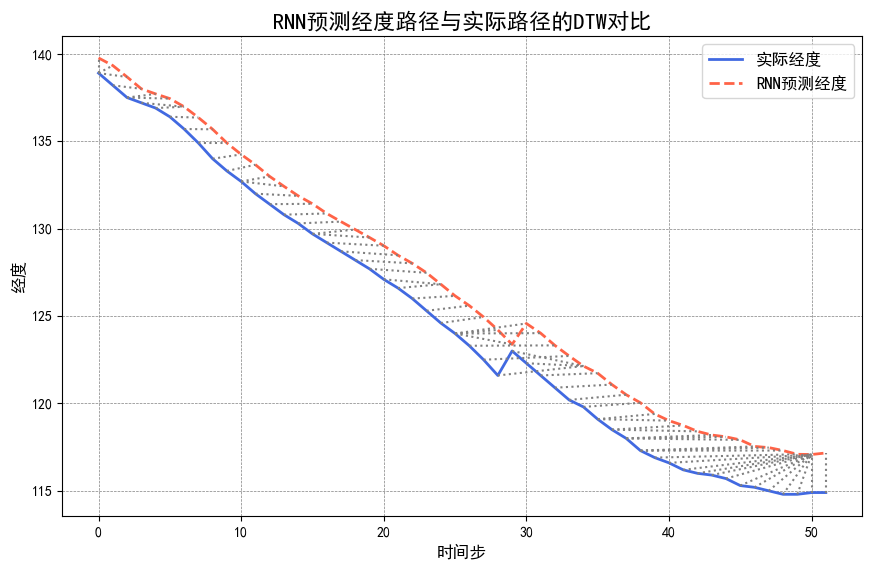

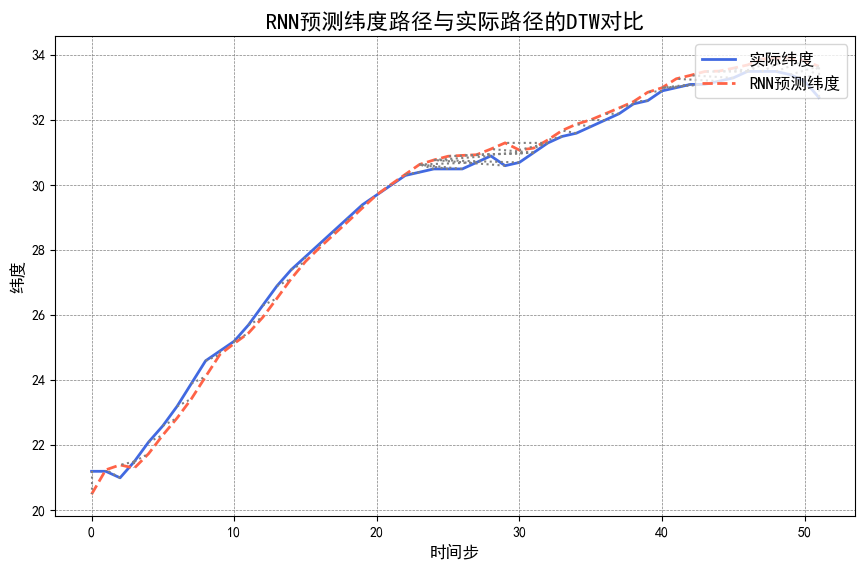

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dtaidistance import dtw

# 1. 读取 RNN 预测结果 Excel 文件
rnn_file_path = "C:\\Users\\z\\Desktop\\Mathor\\RNN贝碧嘉预测.xlsx"
rnn_data = pd.read_excel(rnn_file_path)

# 假设 Excel 文件包含以下列：实际经度、实际纬度、RNN预测经度、RNN预测纬度、时间
actual_lon_rnn = rnn_data['经度']
actual_lat_rnn = rnn_data['纬度']
rnn_predicted_lon = rnn_data['预测经度']
rnn_predicted_lat = rnn_data['预测纬度']

# 2. 选择需要对比的有效路径（去除空值）
valid_indices_lon = ~pd.isnull(actual_lon_rnn) & ~pd.isnull(rnn_predicted_lon)
valid_indices_lat = ~pd.isnull(actual_lat_rnn) & ~pd.isnull(rnn_predicted_lat)

actual_lon_valid = actual_lon_rnn[valid_indices_lon].to_numpy()
predicted_lon_valid = rnn_predicted_lon[valid_indices_lon].to_numpy()

actual_lat_valid = actual_lat_rnn[valid_indices_lat].to_numpy()
predicted_lat_valid = rnn_predicted_lat[valid_indices_lat].to_numpy()

# 3. 计算DTW距离
dtw_distance_lon = dtw.distance(actual_lon_valid, predicted_lon_valid)
dtw_distance_lat = dtw.distance(actual_lat_valid, predicted_lat_valid)

# 输出DTW距离
print(f"经度的DTW距离: {dtw_distance_lon:.4f}")
print(f"纬度的DTW距离: {dtw_distance_lat:.4f}")

# 4. 可视化DTW路径
alignment_lon = dtw.warping_path(actual_lon_valid, predicted_lon_valid)
alignment_lat = dtw.warping_path(actual_lat_valid, predicted_lat_valid)

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置字体和大小
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# 绘制经度对比图
plt.figure(figsize=(10, 6))
plt.plot(actual_lon_valid, label='实际经度', color='royalblue', linewidth=2)
plt.plot(predicted_lon_valid, label='RNN预测经度', color='tomato', linestyle='--', linewidth=2)

# 绘制经度DTW对齐路径
for (i, j) in alignment_lon:
    plt.plot([i, j], [actual_lon_valid[i], predicted_lon_valid[j]], color='gray', linestyle='dotted')

plt.title('RNN预测经度路径与实际路径的DTW对比', fontsize=16)
plt.xlabel('时间步', fontsize=12)
plt.ylabel('经度', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# 调整边距
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# 保存经度图像
plt.savefig('RNN预测经度路径与实际路径DTW对比.png', dpi=500, bbox_inches='tight')
plt.show()

# 绘制纬度对比图
plt.figure(figsize=(10, 6))
plt.plot(actual_lat_valid, label='实际纬度', color='royalblue', linewidth=2)
plt.plot(predicted_lat_valid, label='RNN预测纬度', color='tomato', linestyle='--', linewidth=2)

# 绘制纬度DTW对齐路径
for (i, j) in alignment_lat:
    plt.plot([i, j], [actual_lat_valid[i], predicted_lat_valid[j]], color='gray', linestyle='dotted')

plt.title('RNN预测纬度路径与实际路径的DTW对比', fontsize=16)
plt.xlabel('时间步', fontsize=12)
plt.ylabel('纬度', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# 调整边距
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# 保存纬度图像
plt.savefig('RNN预测纬度路径与实际路径DTW对比.png', dpi=500, bbox_inches='tight')
plt.show()
